In [1]:
# PCA

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

In [3]:
data=pd.read_csv('data/pulsar_stars.csv')
data.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [5]:
data=data[[e for e in data.columns if e!= 'target_class']]
data.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306


In [7]:
# normalizacion

data_rescaled_mano=(data-np.mean(data))/np.std(data)
data_rescaled=StandardScaler().fit_transform(data)

np.sum(data_rescaled-data_rescaled_mano)

 Mean of the integrated profile                  0.000000e+00
 Standard deviation of the integrated profile    1.115067e-10
 Excess kurtosis of the integrated profile       3.456999e-11
 Skewness of the integrated profile              7.172045e-12
 Mean of the DM-SNR curve                       -1.174245e-11
 Standard deviation of the DM-SNR curve          9.144349e-11
 Excess kurtosis of the DM-SNR curve            -2.822222e-11
 Skewness of the DM-SNR curve                   -1.180685e-11
dtype: float64

In [8]:
data_rescaled_mano=(data-np.min(data))/(np.max(data)-np.min(data))
data_rescaled=MinMaxScaler().fit_transform(data)

np.sum(data_rescaled-data_rescaled_mano)

 Mean of the integrated profile                 -1.568736e-13
 Standard deviation of the integrated profile   -5.605374e-14
 Excess kurtosis of the integrated profile      -1.882314e-13
 Skewness of the integrated profile             -2.829209e-14
 Mean of the DM-SNR curve                       -1.212409e-13
 Standard deviation of the DM-SNR curve         -4.598752e-14
 Excess kurtosis of the DM-SNR curve             2.881462e-13
 Skewness of the DM-SNR curve                   -6.918713e-14
dtype: float64

In [9]:
data_rescaled=StandardScaler().fit_transform(data)

In [13]:
pca=PCA()
pca.fit(data_rescaled)
pca.explained_variance_ratio_

array([0.51675584, 0.26807564, 0.10116862, 0.0571781 , 0.03227836,
       0.01998491, 0.00255524, 0.00200328])

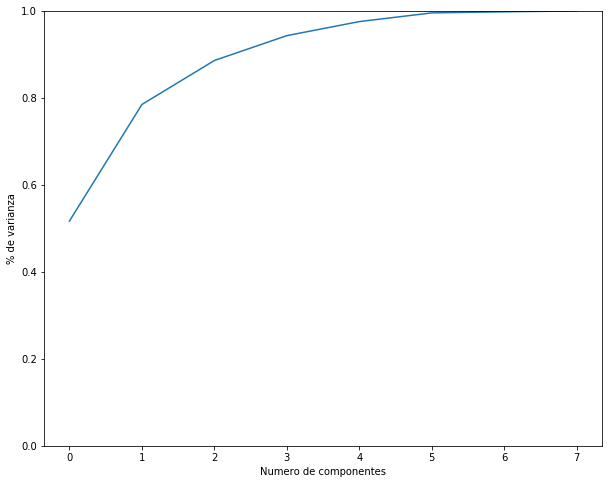

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Numero de componentes')
plt.ylabel('% de varianza')
plt.ylim([0,1])
plt.show();

In [23]:
pca=PCA(n_components=5)
df=pd.DataFrame(pca.fit_transform(data_rescaled))
df.head()

,0,1,2,3,4
0,-1.278849,-1.273133,0.016213,0.662102,0.577362
1,-1.020553,-0.201162,0.670478,1.605779,-0.390326
2,0.188289,0.432114,-0.979766,-0.519232,-0.305346
3,-1.015466,-1.469881,-0.018832,0.938386,0.495189
4,-0.822626,2.123651,0.407953,-0.380922,-0.654083


In [24]:
pd.DataFrame(data_rescaled).head()

,0,1,2,3,4,5,6,7
0,1.149317,1.334832,-0.669570,-0.400459,-0.319440,-0.370625,-0.072798,-0.287438
1,-0.334168,1.802265,-0.011785,-0.370535,-0.371102,-0.588924,0.504427,0.211581
2,-0.314372,-1.053322,-0.145233,-0.116593,-0.322107,-0.235328,-0.125996,-0.391373
3,1.000694,1.553254,-0.513409,-0.390178,-0.304404,-0.275666,-0.312265,-0.481300
4,-0.871402,-0.858879,0.115609,-0.104866,-0.388010,-0.763111,1.324026,1.386794


In [25]:
pd.DataFrame(pca.inverse_transform(df)).head()

,0,1,2,3,4,5,6,7
0,1.156722,1.338373,-0.650692,-0.411991,-0.379564,-0.295096,-0.068565,-0.264716
1,-0.328871,1.803710,0.002397,-0.380840,-0.425600,-0.561543,0.416077,0.293707
2,-0.286647,-1.052225,-0.076029,-0.162948,-0.405896,-0.139841,-0.141241,-0.344996
3,0.991747,1.559323,-0.535180,-0.373068,-0.345561,-0.204928,-0.267297,-0.494321
4,-0.853596,-0.861573,0.159683,-0.135614,-0.403524,-0.754626,1.301144,1.409208


In [ ]:
# ICA